In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
def parse_matlab_output(file_path):
    num_lines = sum(1 for line in open(file_path))

    x_m = np.empty(num_lines)
    y_m = np.empty(num_lines)
    x_p = np.empty(num_lines)
    y_p = np.empty(num_lines)
    
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            data = line.split()
            x_m[i] = float(data[0])  
            y_m[i] = float(data[1])  
            x_p[i] = float(data[2])  
            y_p[i] = float(data[3])  
    return x_m, y_m, x_p, y_p, num_lines

In [2]:
def calculate_segment_coordinates(depth, length, n_side_segments, n_bottom_segments):
    #print(f"box{depth}_{length}")
    n_bottom_segments = int(n_bottom_segments)
    n_total_segmnets = int(2* n_side_segments + n_bottom_segments)
    dy = depth/n_side_segments
    dx = length/n_bottom_segments
    x_m = np.empty(n_total_segmnets)
    y_m = np.empty(n_total_segmnets)
    x_p = np.empty(n_total_segmnets)
    y_p = np.empty(n_total_segmnets)

    #initializing coordinates:
    x_m[0] = -length/2
    y_m[0] = 0
    x_p[0] = -length/2
    y_p[0] = -dy
   
    # first we initialize coordinates array by 1st side
    for i in range(1, n_side_segments):
        x_m[i] = -length/2
        y_m[i] = -dy*(i)
        x_p[i] = -length/2 
        y_p[i] = -dy*(i+1)    

    # now we caluclate points coordinates along bottom
    for i in range(n_side_segments,  n_side_segments+n_bottom_segments):
        i1= i-n_side_segments+1
        x_m[i]=-length/2+dx*(i1-1)
        y_m[i]=-depth
        x_p[i]=-length/2+dx*i1
        y_p[i]=-depth
    
    # last side
    for i in range(n_side_segments+n_bottom_segments, n_side_segments+n_bottom_segments+n_side_segments):
        i1=i-n_side_segments-n_bottom_segments + 1
        x_m[i]=length/2
        y_m[i]=-depth+dy*(i1-1)
        x_p[i]=length/2
        y_p[i]=-depth+dy*(i1)

    stacked_data = np.column_stack((x_m, y_m , x_p, y_p))
    #np.savetxt('box.dat', stacked_data, fmt='%f', delimiter= ' ')
    np.savetxt(f'box{depth}_{length}.dat', stacked_data, fmt='%f', delimiter= ' ')
        

    return x_m, y_m, x_p, y_p

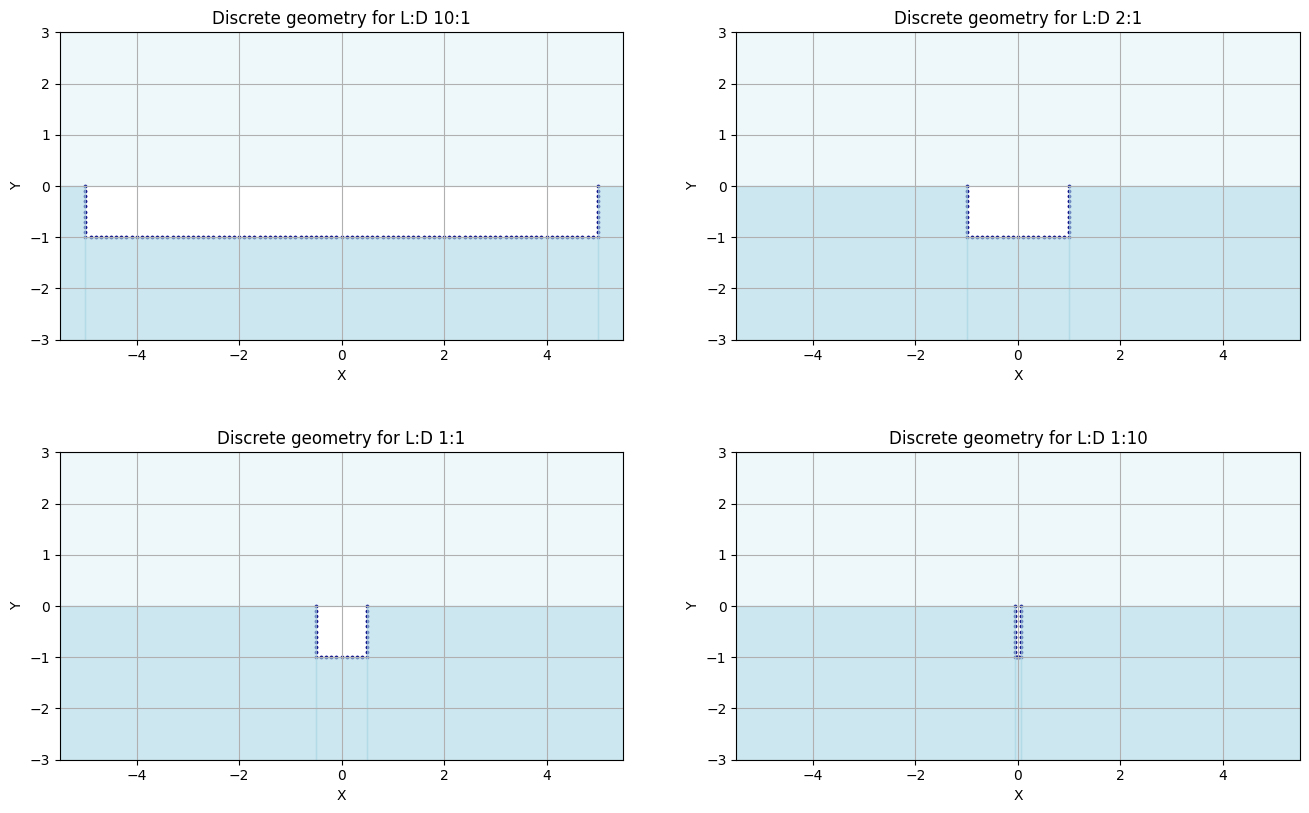

In [18]:
# same but from file:
file_list = ['box10_1.dat','box2_1.dat','box1_1.dat', 'box1_10.dat']

aspect_ratio_strings = ['L:D 10:1', 'L:D 2:1', 'L:D 1:1', 'L:D 1:10']
data_dir_path = '/home/anna/annaCode/UiO/MEK4420/Oblig2_work/'


fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for i in range(0,4):
    file_path = os.path.join(data_dir_path, file_list[i])
    x_m, y_m, x_p, y_p,  nn_total_segments = parse_matlab_output(file_path)
    axs[i//2, i%2].scatter(np.append(x_m, x_p[-1]) ,np.append(y_m, y_p[-1]), s=3, color = 'navy')
    axs[i//2, i%2].grid(True)
    axs[i//2, i%2].set_xlabel('X')
    axs[i//2, i%2].set_ylabel('Y')
    x_lim_min = -5.5
    x_lim_max = 5.5
    axs[i//2, i%2].set_xlim(x_lim_min, x_lim_max)
    y_lim_min = -3
    y_lim_max = 3
    axs[i//2, i%2].set_ylim(y_lim_min, y_lim_max)
    axs[i//2, i%2].set_aspect('equal')
    left_fill = np.linspace(x_lim_min, x_m[0], 100)
    bottom_fill = np.linspace(x_m[0], x_m[-1],100)
    right_fill = np.linspace(x_m[-1],x_lim_max, 100)
    top_fill = np.linspace(x_lim_min, x_lim_max,100)
    axs[i//2, i%2].fill_between(left_fill,y_lim_min, 0, color = 'lightblue', alpha = 0.6)
    axs[i//2, i%2].fill_between(top_fill,0, y_lim_max, color = 'lightblue', alpha = 0.2)
    axs[i//2, i%2].fill_between(bottom_fill,y_lim_min, min(y_m), color = 'lightblue', alpha = 0.6)
    axs[i//2, i%2].fill_between(right_fill,y_lim_min, 0, color = 'lightblue', alpha = 0.6)
    title = f'Discrete geometry for {aspect_ratio_strings[i]}'
    axs[i//2, i%2].set_title(title)

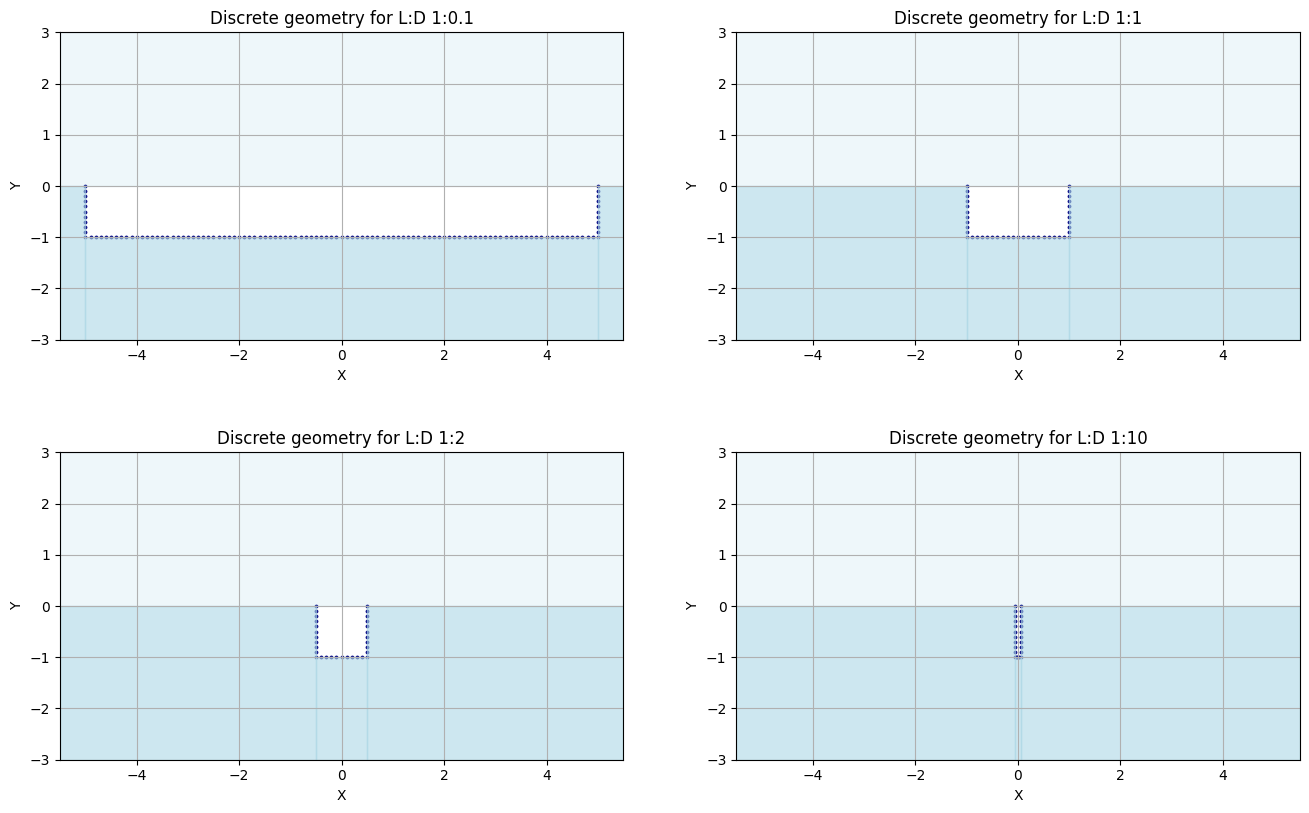

In [7]:
# length to depth ratio
l_d_ratios = [10,2,1, 1]
aspect_ratio_strings = ['L:D 1:0.1', 'L:D 1:1', 'L:D 1:2', 'L:D 1:10']

#(n2 sides, n1 bottom)
res = [(10,10),(10,10),(10,10),(10,50)]
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for i in range(0,4):
    depth = 1
    
    length = depth * l_d_ratios[i]
    if i == 3:
        depth = 1
        length = 0.1
    x_m, y_m , x_p, y_p = calculate_segment_coordinates(depth,length, res[i][0]*depth, res[i][1]*length)
    axs[i//2, i%2].scatter(np.append(x_m, x_p[-1]) ,np.append(y_m, y_p[-1]), s=3, color = 'navy')
    axs[i//2, i%2].grid(True)
    axs[i//2, i%2].set_xlabel('X')
    axs[i//2, i%2].set_ylabel('Y')
    x_lim_min = -5.5
    x_lim_max = 5.5
    axs[i//2, i%2].set_xlim(x_lim_min, x_lim_max)
    y_lim_min = -3
    y_lim_max = 3
    axs[i//2, i%2].set_ylim(y_lim_min, y_lim_max)
    axs[i//2, i%2].set_aspect('equal')
    left_fill = np.linspace(x_lim_min, x_m[0], 100)
    bottom_fill = np.linspace(x_m[0], x_m[-1],100)
    right_fill = np.linspace(x_m[-1],x_lim_max, 100)
    top_fill = np.linspace(x_lim_min, x_lim_max,100)
    axs[i//2, i%2].fill_between(left_fill,y_lim_min, 0, color = 'lightblue', alpha = 0.6)
    axs[i//2, i%2].fill_between(top_fill,0, y_lim_max, color = 'lightblue', alpha = 0.2)
    axs[i//2, i%2].fill_between(bottom_fill,y_lim_min, min(y_m), color = 'lightblue', alpha = 0.6)
    axs[i//2, i%2].fill_between(right_fill,y_lim_min, 0, color = 'lightblue', alpha = 0.6)
    title = f'Discrete geometry for {aspect_ratio_strings[i]}'
    axs[i//2, i%2].set_title(title)


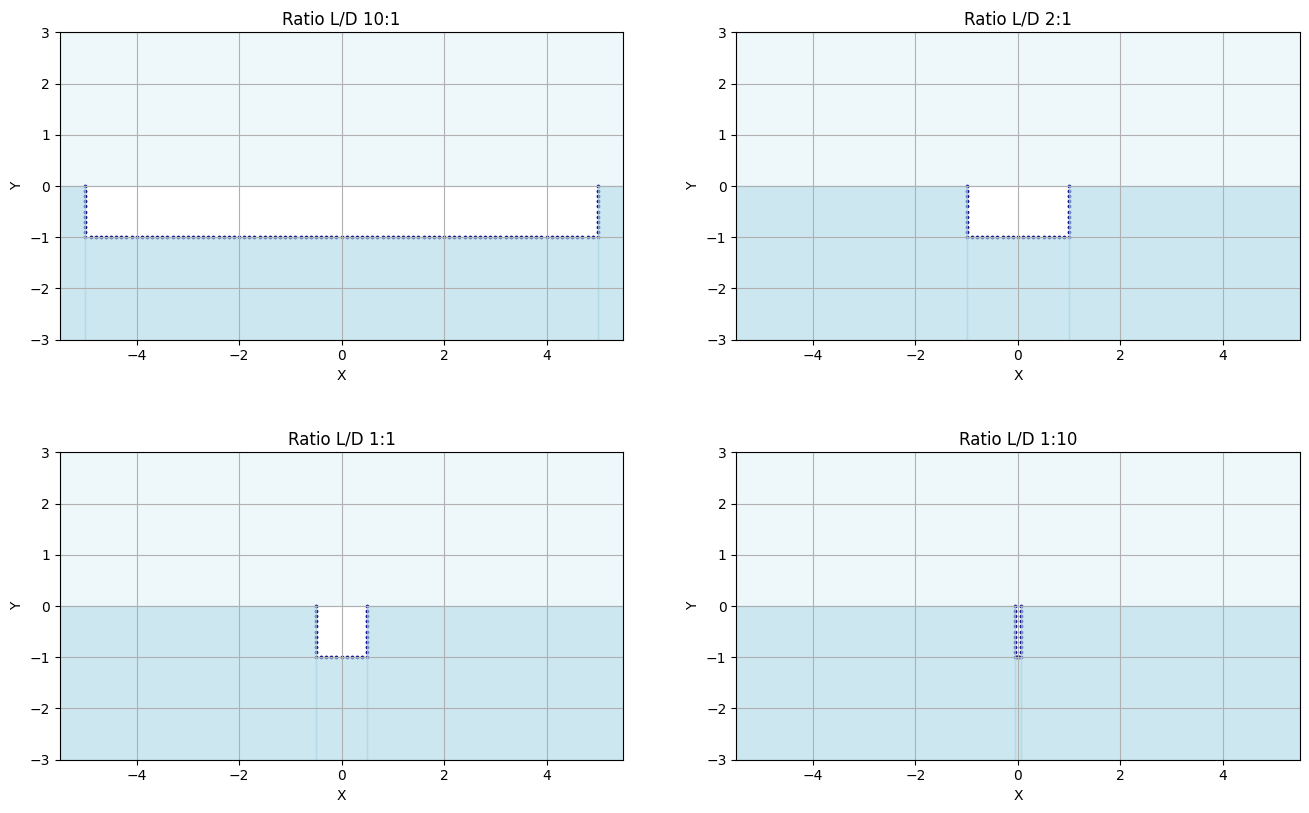

In [84]:
# length to depth ratio
l_d_ratios = [10,2,1, 1]
#(n2 sides, n1 bottom)
res = [(10,10),(10,10),(10,10),(10,50)]
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for i in range(0,4):
    depth = 1
    
    length = depth * l_d_ratios[i]
    if i == 3:
        depth = 1
        length = 0.1
    x_m, y_m , x_p, y_p = calculate_segment_coordinates(depth,length, res[i][0]*depth, res[i][1]*length)
    axs[i//2, i%2].scatter(np.append(x_m, x_p[-1]) ,np.append(y_m, y_p[-1]), s=3, color = 'navy')
    axs[i//2, i%2].grid(True)
    axs[i//2, i%2].set_xlabel('X')
    axs[i//2, i%2].set_ylabel('Y')
    x_lim_min = -5.5
    x_lim_max = 5.5
    axs[i//2, i%2].set_xlim(x_lim_min, x_lim_max)
    y_lim_min = -3
    y_lim_max = 3
    axs[i//2, i%2].set_ylim(y_lim_min, y_lim_max)
    axs[i//2, i%2].set_aspect('equal')
    left_fill = np.linspace(x_lim_min, x_m[0], 100)
    bottom_fill = np.linspace(x_m[0], x_m[-1],100)
    right_fill = np.linspace(x_m[-1],x_lim_max, 100)
    top_fill = np.linspace(x_lim_min, x_lim_max,100)
    axs[i//2, i%2].fill_between(left_fill,y_lim_min, 0, color = 'lightblue', alpha = 0.6)
    axs[i//2, i%2].fill_between(top_fill,0, y_lim_max, color = 'lightblue', alpha = 0.2)
    axs[i//2, i%2].fill_between(bottom_fill,y_lim_min, min(y_m), color = 'lightblue', alpha = 0.6)
    axs[i//2, i%2].fill_between(right_fill,y_lim_min, 0, color = 'lightblue', alpha = 0.6)
    title = f'Ratio L/D {l_d_ratios[i]}:{1}'
    if i == 3:
        title = f'Ratio L/D {1}:{10}'
    axs[i//2, i%2].set_title(title)

    

In [11]:
for i in range(0,4):
    print(i//2)

0
0
1
1


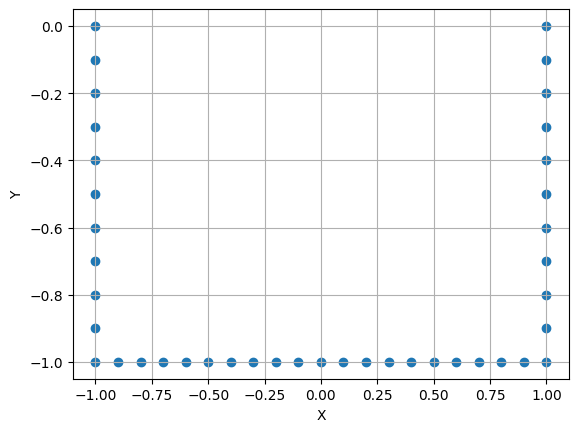

In [6]:
#box of draught depth and length 
depth = 1
length = 2
n_side_sements = 10
n_bottom_segments = 20

x_m, y_m , x_p, y_p = calculate_segment_coordinates(depth,length, n_side_sements, n_bottom_segments)
plt.scatter(np.append(x_m, x_p[-1]) ,np.append(y_m, y_p[-1]))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


In [ ]:
depth = 1
length = 2
n_side_sements = 10
n_bottom_segments = 20

x_m, y_m , x_p, y_p = calculate_segment_coordinates(depth,length, n_side_sements, n_bottom_segments)
plt.scatter(np.append(x_m, x_p[-1]) ,np.append(y_m, y_p[-1]))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

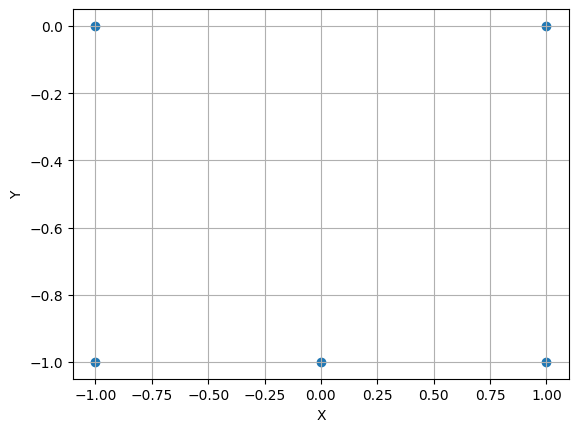

In [4]:
#box of draught depth and length 
depth = 1
length = 2
n_side_sements = 1
n_bottom_segments = 2

x_m, y_m , x_p, y_p = calculate_segment_coordinates(depth,length, n_side_sements, n_bottom_segments)
plt.scatter(np.append(x_m, x_p[-1]) ,np.append(y_m, y_p[-1]))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [20]:
def get_matlab_results():
    file_path = '/home/anna/MATLAB/R2023b/bin/matlab_points.txt'
    with open(file_path, 'r') as file:
        arrays = []
        for line in file:
            array = np.array([float(x) for x in line.split()])
            arrays.append(array)
    return np.array(arrays)

matlab_results = get_matlab_results()
#n_side_sements = 40
x_m, y_m, x_p, y_p = calculate_segment_coordinates(depth,length, n_side_sements, n_bottom_segments)
python_results = np.stack((x_m, y_m, x_p, y_p), axis=0)

for i in range(0,4):
    result = np.isclose(matlab_results[i],  python_results[i], rtol=10**(-3))
    print(result)
    assert np.allclose(matlab_results[i], python_results[i], atol=10**(-3)), "Arrays are not equal to 3 decimal places"

NameError: name 'n_bottom_segments' is not defined